# Tarefa 3 – Primeira rede CNN com MNIST

Getting MNIST Data Set

In [ ]:
!pip install mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mnist    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
# Training data (also validation data)
X_train = mnist.train_images()
y_train = mnist.train_labels()
# Test data
X_test = mnist.test_images()
y_test = mnist.test_labels()

X_train.shape, X_test.shape, X_train.shape[0]

((60000, 28, 28), (10000, 28, 28), 60000)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# reshape to be [samples][pixels][width][height]
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [ ]:
# Normalize inputs
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# One hot enconde outputs
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
nb_classes = y_train.shape[1]
y_train.shape

(48000, 10)

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), 
                  strides=(1, 1),  
                  input_shape=(28, 28, 1),  
                  activation='relu',))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(nb_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1000)             

In [ ]:
# checkpoint: store the best model
checkpoint_model = 'tarefa3-weights.best.hdf5'
checkpoint = ModelCheckpoint(checkpoint_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [ ]:
BATCH_SIZE = 128
num_classes = 10
NB_EPOCHS = 10



out = model.fit(X_train, y_train, 
          batch_size=BATCH_SIZE, 
          epochs=NB_EPOCHS,
          validation_data=(X_val, y_val),
          callbacks=callbacks_list,
          verbose=0) 


Epoch 00001: val_accuracy improved from -inf to 0.97667, saving model to tarefa3-weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.97667 to 0.98258, saving model to tarefa3-weights.best.hdf5

Epoch 00003: val_accuracy improved from 0.98258 to 0.98525, saving model to tarefa3-weights.best.hdf5

Epoch 00004: val_accuracy improved from 0.98525 to 0.98708, saving model to tarefa3-weights.best.hdf5

Epoch 00005: val_accuracy improved from 0.98708 to 0.98833, saving model to tarefa3-weights.best.hdf5

Epoch 00006: val_accuracy improved from 0.98833 to 0.98933, saving model to tarefa3-weights.best.hdf5

Epoch 00007: val_accuracy did not improve from 0.98933

Epoch 00008: val_accuracy improved from 0.98933 to 0.99083, saving model to tarefa3-weights.best.hdf5

Epoch 00009: val_accuracy did not improve from 0.99083

Epoch 00010: val_accuracy improved from 0.99083 to 0.99108, saving model to tarefa3-weights.best.hdf5


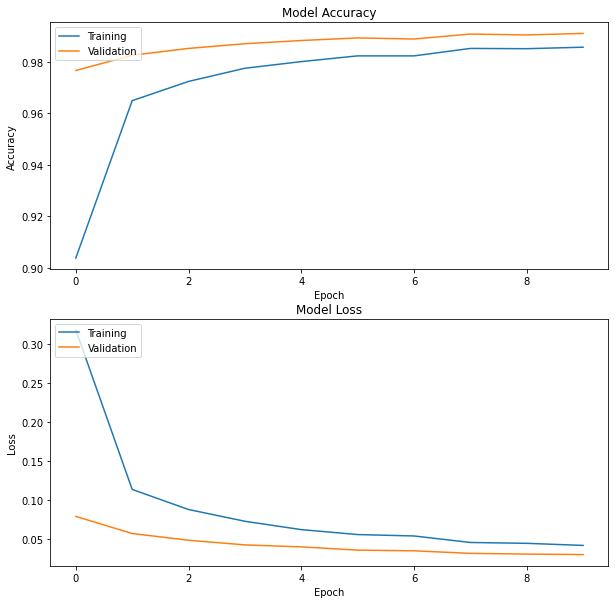

In [ ]:
fig, ([ax0, ax1]) = plt.subplots(nrows=2, 
                                ncols=1,
                                figsize=(10,10))

# Add data to ax0
ax0.plot(out.history["accuracy"])
ax0.plot(out.history["val_accuracy"])
# Change the y axis limits
#ax2.set_ylim([0.6, 0.9])
# Customize ax0
ax0.set(title="Model Accuracy",
        xlabel="Epoch",
        ylabel="Accuracy");
# Add a legend to ax0
ax0.legend(["Training", "Validation"], loc="upper left");

# Add data to ax1
ax1.plot(out.history["loss"])
ax1.plot(out.history["val_loss"])
# Change the y axis limits
#ax1.set_ylim([0.6, 0.9])
# Customize ax0
ax1.set(title="Model Loss",
        xlabel="Epoch",
        ylabel="Loss");
# Add a legend to ax0
ax1.legend(["Training", "Validation"], loc="upper left");

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE,  verbose=0)
print('Test loss = ',score[0],'\nTest accuracy = ',score[1])

Test loss =  0.021837923675775528 
Test accuracy =  0.9926000237464905


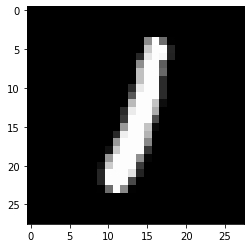

[7.0701969e-07 9.9999642e-01 8.7646853e-08 1.8750483e-10 2.0570767e-06
 2.4942549e-08 2.0089779e-08 4.4688676e-08 4.2301215e-07 1.7232136e-07]
Model digit prediction: 1


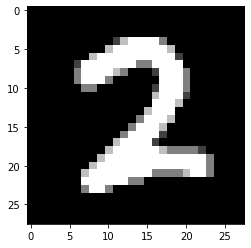

[5.0973648e-10 8.7541531e-07 9.9999428e-01 4.8737512e-08 5.3114213e-10
 1.7499047e-14 1.1317180e-12 4.9418700e-06 3.0285296e-09 1.1770296e-12]
Model digit prediction: 2


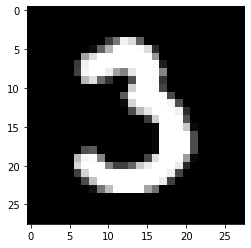

[1.02204176e-10 2.46029072e-06 2.66870444e-07 9.99987364e-01
 1.08488529e-09 8.21664980e-06 2.51591109e-11 1.41949712e-07
 3.31424786e-07 1.23382699e-06]
Model digit prediction: 3


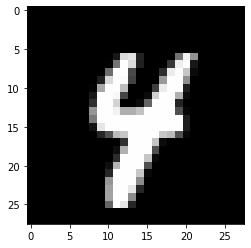

[1.9291468e-15 3.8322592e-11 2.8820499e-12 3.4320332e-14 1.0000000e+00
 1.5061123e-13 5.4892115e-13 6.7265205e-10 3.5073444e-09 1.2070033e-08]
Model digit prediction: 4


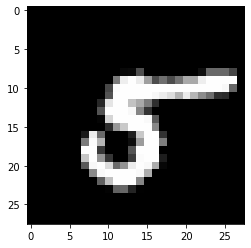

[3.0524305e-08 4.2892132e-10 1.2359161e-09 3.9595550e-05 8.2709872e-10
 9.9753332e-01 2.5298496e-06 7.7994655e-10 2.4245940e-03 1.5164041e-08]
Model digit prediction: 5


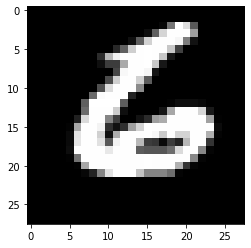

[2.3982929e-07 6.6844241e-10 1.3288088e-07 8.1233456e-09 4.6776978e-07
 7.5724193e-07 9.9999726e-01 1.6827001e-12 1.1914190e-06 1.5638332e-09]
Model digit prediction: 6


In [ ]:
# Predict single images
nb_images = 6
# Get images from test set
#X_to_predict = X_test[:nb_images]
X_to_predict = X_test[-nb_images:]
# Predicts
# Use the model to predict the images class
y_preds = list(model.predict_proba(X_to_predict))

# Display
for i in range(nb_images):
    plt.imshow(np.reshape(X_to_predict[i], [28, 28]), cmap='gray')
    plt.show()
    output=np.where(y_preds[i]==y_preds[i].max())
    print(y_preds[i])
    print("Model digit prediction:", output[0][0])

#pause()